# Multi-Armed Bandits

In [1]:
!hello

Helloooo!!👋


This is my workspace for playing around with the problem of Multi-Armed Bandits

The required imports...

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math

## $\epsilon$-greedy method
This cell defines the constants needed throughout this experiment...
- `k` is the number of arms in the experiment
- `std_dev` is the spread at which the bandits choose their reward from the mean
- `epsilon` is the probability at which the epsilon-greedy method chooses to explore while exploiting
- `N` is the number of games the bot learns through

In [18]:
k = 10
std_dev = 1
epsilon = 0
N = 2000

`q_stars` is the list of q* or the means of rewards of the bandits

In [19]:
q_stars = []
for i in range(k):
    q_stars.append(np.random.random()*4 - 2)

`games` is the numpy array containing the rewards of every bandit at any instant

In [20]:
games = np.zeros((k, N))
for i in range(k):
    q_star = q_stars[i]
    games[i] = np.random.normal(q_star, std_dev, N)

The function `run(eps)` takes in $\epsilon$ as an argument and runs the learning algorithm and finally gives an array containing the cumulative rewards after every choice

In [21]:
def run(eps):
    reward = np.zeros((N))
    Q_t = [0,]*k
    freq = [0,]*k
    index = np.zeros(N)
    for i in range(k):
        A = i
        index[i] = A
        R = games[i][A]
        reward[i] = reward[i-1] + R
        Q_t[A] = R
        freq[A] = 1
#     print(Q_t)
    for i in range(k, N):
        if np.random.random() > eps:
            A = Q_t.index(max(Q_t))
    #         print(A)
            R = games[A][i]
            reward[i] = reward[i-1] + R
            freq[A] += 1
            Q_t[A] += (1/freq[A])*(R - Q_t[A])
        else:
            A = math.floor(np.random.random()*10)
    #         print(A)
            R = games[A][i]
            reward[i] = reward[i-1] + R
            freq[A] += 1
            Q_t[A] += (1/freq[A])*(R - Q_t[A])
        index[i] = A
    return reward

`optimal` is a numpy array containing the maximum reward one can get on an average

In [22]:
optimal = (np.arange(N)+1)*max(q_stars)

This cell runs the function `run()` with different epsilons as arguments to analyse the method's behaviour compared with the optimal learning as the epsilon changes

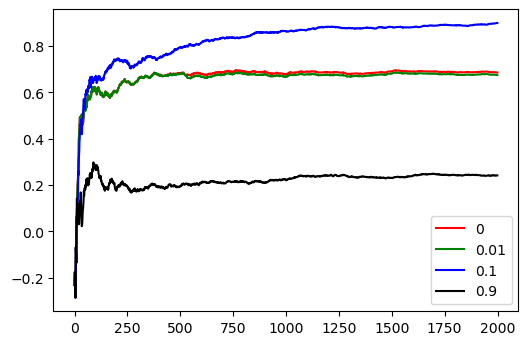

In [36]:
plt.figure(dpi=100)
plt.plot(np.arange(N), run(0)/optimal, color='red')
plt.plot(np.arange(N), run(0.01)/optimal, color='green')
plt.plot(np.arange(N), run(0.1)/optimal, color='blue')
plt.plot(np.arange(N), run(0.9)/optimal, color='black')
plt.legend([0, 0.01, 0.1, 0.9])
plt.show()

This cell runs the function `run()` with different epsilons as arguments to analyse the method's behaviour by plotting the average cumulative reward as the epsilon changes

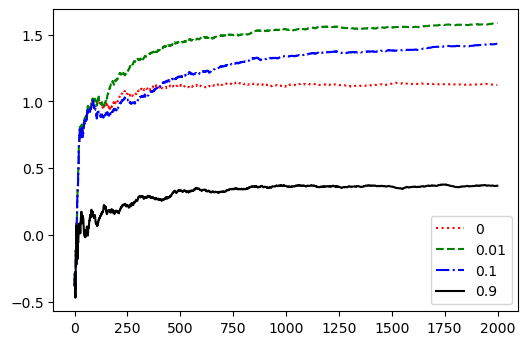

In [37]:
plt.figure(dpi=100)
plt.plot(np.arange(N), run(0)/(np.arange(N)+1), color='red', linestyle=":")
plt.plot(np.arange(N), run(0.01)/(np.arange(N)+1), color='green', linestyle='--')
plt.plot(np.arange(N), run(0.1)/(np.arange(N)+1), color='blue', linestyle='-.')
plt.plot(np.arange(N), run(0.9)/(np.arange(N)+1), color='black')
plt.legend([0, 0.01, 0.1, 0.9])
plt.show()

In [25]:
sample = 100
l = np.arange(sample)*0.01

Don't ask me about this plo!! 😁😁 I just wanted to see how it looks... <br> Doesn't it look like my mind when it tries to multi-task!!

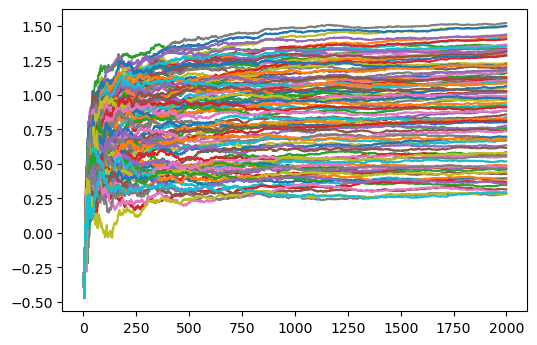

In [40]:
opt = np.zeros(sample)
plt.figure(dpi=100)
for i in range(sample):
    reward = run(l[i])
    opt[i] = reward[N-1]/N
    plt.plot(np.arange(N), reward/(np.arange(N)+1))
# plt.legend(l)
plt.show()

This plot checks the most optimal $\epsilon$

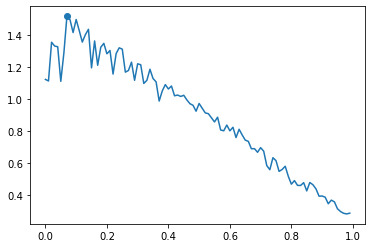

The maximum occurs at ε = 0.07


In [42]:
plt.figure(100)
plt.plot(l, opt)
plt.scatter([np.argmax(opt)*0.01], opt[np.argmax(opt)])
plt.show()
print(f'The maximum occurs at \u03b5 = {np.argmax(opt)*0.01}')

## Other Stepsizes

### Constant Stepsize

Checking with a constant stepsize!!!

In [62]:
def run_with_step(eps, step):
    reward = np.zeros((N))
    Q_t = [0,]*k
    freq = [0,]*k
    index = np.zeros(N)
    for i in range(k):
        A = i
        index[i] = A
        R = games[i][A]
        reward[i] = reward[i-1] + R
        Q_t[A] = R
        freq[A] = 1
#     print(Q_t)
    for i in range(k, N):
        if np.random.random() > eps:
            A = Q_t.index(max(Q_t))
    #         print(A)
            R = games[A][i]
            reward[i] = reward[i-1] + R
            freq[A] += 1
            Q_t[A] += step*(R - Q_t[A])
        else:
            A = math.floor(np.random.random()*10)
    #         print(A)
            R = games[A][i]
            reward[i] = reward[i-1] + R
            freq[A] += 1
            Q_t[A] += step*(R - Q_t[A])
        index[i] = A
    return reward

In [63]:
def check(step):
    plt.plot(np.arange(N), run_with_step(0, step)/(np.arange(N)+1), color='red', linestyle=":")
    plt.plot(np.arange(N), run_with_step(0.01, step)/(np.arange(N)+1), color='green', linestyle='--')
    plt.plot(np.arange(N), run_with_step(0.1, step)/(np.arange(N)+1), color='blue', linestyle='-.')
    plt.plot(np.arange(N), run_with_step(0.9, step)/(np.arange(N)+1), color='black', linestyle='--')

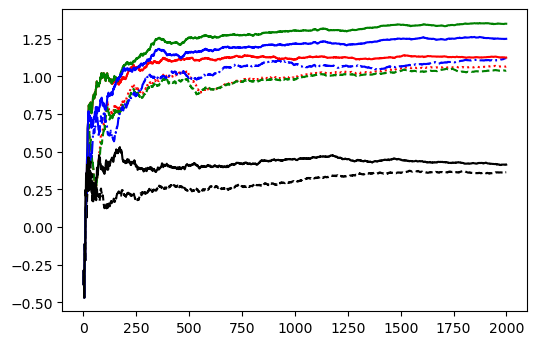

In [64]:
plt.figure(dpi=100)
check(1)
plt.plot(np.arange(N), run(0)/(np.arange(N)+1), color='red')
plt.plot(np.arange(N), run(0.01)/(np.arange(N)+1), color='green')
plt.plot(np.arange(N), run(0.1)/(np.arange(N)+1), color='blue')
plt.plot(np.arange(N), run(0.9)/(np.arange(N)+1), color='black')
# plt.legend([0, 0.01, 0.1, 0.9])
plt.show()

This seems pretty clumsy...

### Decreasing Stepsize